<a href="https://colab.research.google.com/github/scoopcash/jan10-Deep-Neural-Networks/blob/main/nonlinear_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instructor Do: Connecting Neurons

In [1]:
# Initial imports
import pandas as pd
import numpy as np
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

%matplotlib inline

## Creating Dummy Data

In [2]:
# Creating dummy non-linear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

In [3]:
# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1,1)

In [4]:
# Creating a DataFrame to plot the non-linear dummy data
df_moons = pd.DataFrame(X_moons, columns=['Feature 1','Feature 2'])
df_moons['Target'] = y_moons
df_moons

,Feature 1,Feature 2,Target
0,0.676217,0.815220,0
1,1.487143,-0.210519,1
2,-1.027709,0.354966,0
3,0.236012,1.025531,0
4,1.856695,-0.042783,1
...,...,...,...
995,0.816425,0.584748,0
996,0.864083,0.195920,0
997,1.865044,0.086256,1
998,-0.836507,0.167338,0


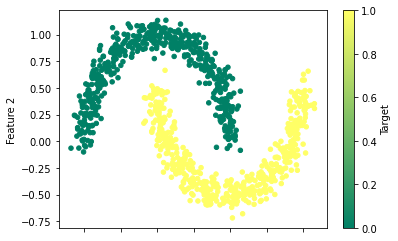

In [5]:
# Plotting the non-linear dummy data
df_moons.plot.scatter(x='Feature 1', y='Feature 2', c='Target', colormap='summer')

## Data Preprocessing

In [6]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(X_moons, y_moons, random_state=1)

In [7]:
# Create the scaler instance
X_moon_scaler = StandardScaler().fit(X_moon_train)

In [ ]:
# Fit the scaler
#see above

In [8]:
# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)

X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

## Neural Network Model Creation

![Simple neural network](../Images/simple-nn.png)

In [9]:
# Create the sequential model
nn = Sequential()

In [10]:
# First layer
number_inputs = 2
number_hidden_nodes = 6

nn.add(
    Dense(units=number_hidden_nodes, input_dim=number_inputs, activation = 'relu')
)

### Output Layer

![Output layer](../Images/simple-nn-layer-2.png)

In [11]:
# Output layer
nn.add(
    Dense(1, activation='sigmoid')
)

In [12]:
# Model summary
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 18        
                                                                 
 dense_1 (Dense)             (None, 1)                 7         
                                                                 
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


## Compile the Model

In [13]:
# Compile model
nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

## Fit the Model

In [14]:
# Training the model with the non-linear data
model_mood = nn.fit(X_moon_train_scaled, y_moon_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 1s 2ms/step - loss: 0.5022 - accuracy: 0.8347
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4733 - accuracy: 0.8467
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4471 - accuracy: 0.8547
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4235 - accuracy: 0.8560
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4016 - accuracy: 0.8680
Epoch 6/100
24/24 [==============================] - 0s 3ms/step - loss: 0.3824 - accuracy: 0.8667
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 0.3649 - accuracy: 0.8720
Epoch 8/100
24/24 [==============================] - 0s 2ms/step - loss: 0.3497 - accuracy: 0.8707
Epoch 9/100
24/24 [==============================] - 0s 2ms/step - loss: 0.3364 - accuracy: 0.8733
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 0.3247 - accuracy: 0.8747
Epoch 11/

## Model Evaluation

In [15]:
# Evaluate the model using non-linear testing data
model_moon_loss, model_moon_accuracy = nn.evaluate(X_moon_test_scaled, y_moon_test)

8/8 [==============================] - 0s 2ms/step - loss: 0.2022 - accuracy: 0.9160
